# Tabular Data

Processing tabular data using numpy

In [3]:
import numpy
import os

In [2]:
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings. The string

In [4]:
distance_file = os.path.join('data', 'distance_data_headers.csv')

distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [5]:
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [6]:
# Slice distances to get the numerical values (everything but the header)
data = distances[1:]
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [7]:
data = data.astype(numpy.float)
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [8]:
# To slice a 2D
# array_name[row_index, column_index]

print(data[0,1])
print(data[1,0])

8.9542
2.0


In [9]:
small_data = data[0:10, 0:3]
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [10]:
print(small_data[:, 1:])

[[8.9542 5.8024]
 [8.6181 6.0942]
 [9.0066 6.0637]
 [9.2002 6.0227]
 [9.1294 5.9365]
 [9.0462 6.2553]
 [8.8657 5.9186]
 [9.3256 6.2351]
 [9.4184 6.1993]
 [9.06   6.0478]]


In [11]:
# data_average = numpy.mean(data_set) 

In [12]:
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [13]:
thr4_atp = data[:,1]
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

10.876950930000001


In [16]:
# Create a variable called num_columns which is the number of columns in our data
num_columns=len(data[0,:])
print(num_columns)

5


In [21]:
for i in range(1, num_columns):
    #print(i)
    column = data[:, i]
    avg_col = numpy.mean(column)
    data_label = headers[i]
    print(F'{data_label}: {avg_col:.3f}')

THR4_ATP: 10.877
THR4_ASP: 7.342
TYR6_ATP: 11.210
TYR6_ASP: 10.993


# Plotting

Plotting data using matplotlib

In [22]:
import matplotlib.pyplot as plt

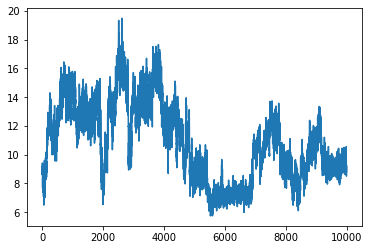

In [23]:
plt.figure()
plt.plot(data[:,1])

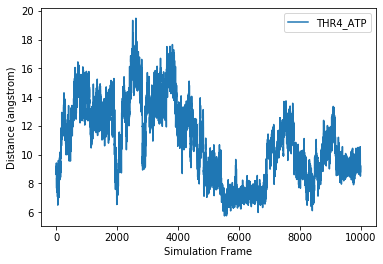

In [26]:
plt.figure()

sample_name = headers[1]

plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1], label=sample_name)
plt.legend()

plt.savefig(F'{sample_name}.png', dpi=300)

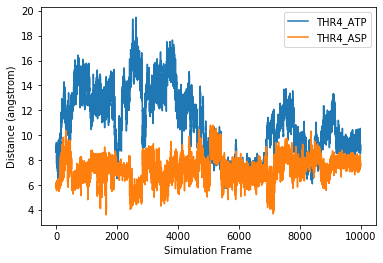

In [28]:
plt.figure()

plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1], label=headers[1])
plt.plot(data[:,2], label=headers[2])
plt.legend()

plt.savefig('two_samples.png', dpi=300)

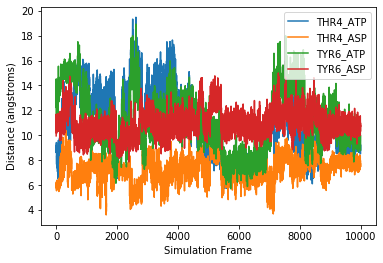

In [34]:
plt.figure()

for col in range(1, num_columns):
    plt.plot(data[:, col], label=headers[col])

plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstroms)')
plt.legend()

plt.savefig('all_samples.png')

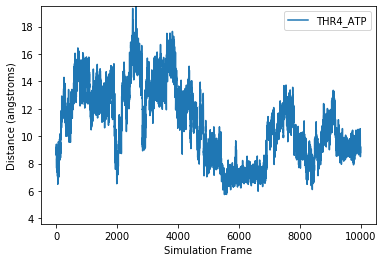

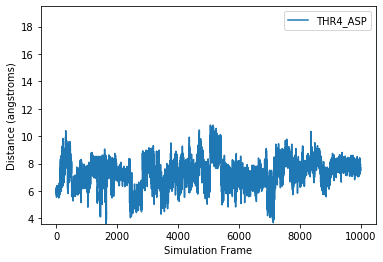

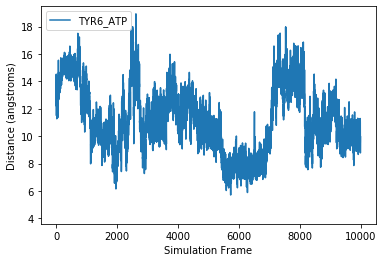

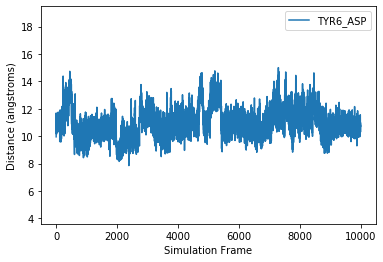

In [36]:
# Make a plot for each sample.
# Try adding savefig with file name equal to sample name.

data_min = numpy.min(data[:, 1:])
data_max = numpy.max(data[:, 1:])

for col in range(1, num_columns):
    sample_name = headers[col]
    #can also just use "headers[col]" instead of sample_name in savefig
    plt.figure()
    plt.plot(data[:, col], label=sample_name)
    plt.ylim(data_min, data_max)
    
    plt.xlabel('Simulation Frame')
    plt.ylabel('Distance (angstroms)')
    plt.legend()
    plt.savefig(F'{sample_name}.png')

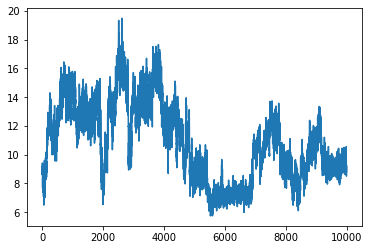

In [37]:
plt.figure()
plt.plot(data[:,0], data[:,1])

In [39]:
print(data[:10:2, :])

[[ 1.      8.9542  5.8024 11.5478  9.9557]
 [ 3.      9.0066  6.0637 13.0924 11.3043]
 [ 5.      9.1294  5.9365 13.5321 10.6279]
 [ 7.      8.8657  5.9186 12.9312 10.2176]
 [ 9.      9.4184  6.1993 13.2614 10.366 ]]


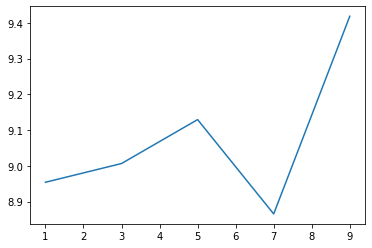

In [40]:
plt.figure()
plt.plot(data[:10:2, 0], data[:10:2, 1])

Text(0, 0.5, 'Distance (angstrom)')

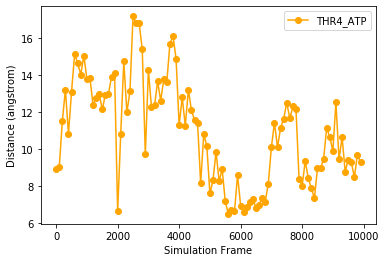

In [49]:
plt.figure()
plt.plot(data[::100,0], data[::100,1],'-o', label=headers[1], color='orange')
plt.legend()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')